# SHAP

In [92]:
!pip install -q shap scikit-learn

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import shap

# Train an SVM classifier
X_train, X_test, y_train, y_test = train_test_split(
    *shap.datasets.iris(), test_size=0.2, random_state=0
)
svm = SVC(kernel="rbf", probability=True)
svm.fit(X_train, y_train)

# Use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

# Plot the SHAP values for the output of the first instance
force = shap.plots.force(
    base_value=explainer.expected_value[0],
    shap_values=shap_values[0][0, :],
    features=X_test.iloc[0, :],
    link="logit",
)

# Save the plot to an HTML file
shap.save_html("shap.html", force)

# Show the plot
force

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 30/30 [00:00<00:00, 55.90it/s]


# Decision trees

In [ ]:
!pip install -q scikit-learn

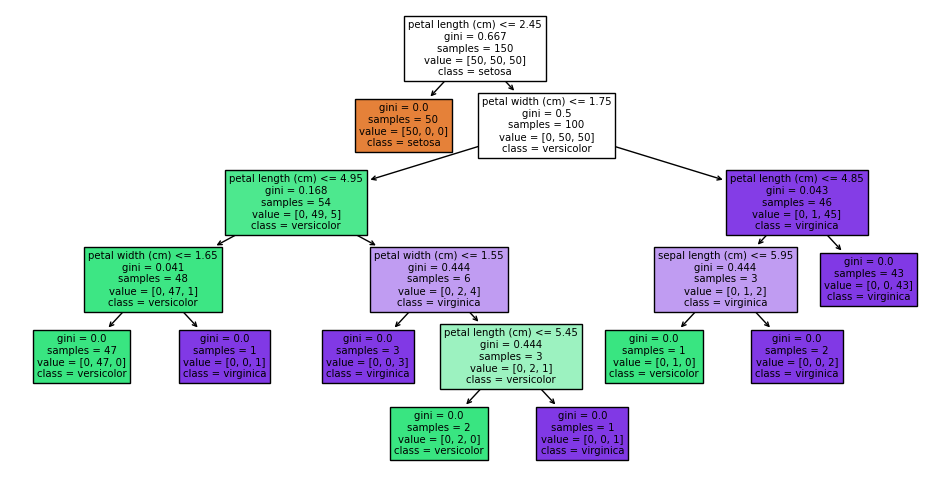

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

# Load iris dataset
iris = load_iris()

# Define features and target
X = iris.data
y = iris.target

# Create decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

# Generate visual representation of decision tree
plt.figure(figsize=(12, 6))

tree.plot_tree(
    dt,
    feature_names=iris.feature_names,
    class_names=list(iris.target_names),
    filled=True,
)

plt.savefig("tree.png", dpi=250, bbox_inches="tight")
plt.show()

# Rule-Based Models

In [94]:
# Create rule-based model
def rule_based_model(X):
    if X[2] <= 2.45:
        return 0
    elif X[3] <= 1.75:
        if X[2] <= 4.95:
            if X[3] <= 1.65:
                return 1
            else:
                return 2
        else:
            if X[3] <= 1.55:
                return 1
            else:
                return 2
    else:
        if X[2] <= 4.85:
            if X[3] <= 1.65:
                return 2
            else:
                return 1
        else:
            return 2


# Test rule-based model
X_test = [[5.1, 3.5, 1.4, 0.2], [6.2, 3.4, 5.4, 2.3]]
for x in X_test:
    print(f"Input: {x}, Prediction: {rule_based_model(x)}")

Input: [5.1, 3.5, 1.4, 0.2], Prediction: 0
Input: [6.2, 3.4, 5.4, 2.3], Prediction: 2
